In [1]:
#import thư viện cần sử dụng cho bài toán
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

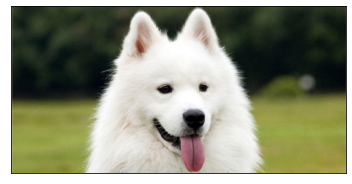

In [2]:
#Đọc vào file ảnh cần giảm kích thước và hiển thị ra ngoài màn hình
image = Image.open('C:/Users/HOANG NAM/Desktop/dog.png')
axes = plt.axes(xticks=[], yticks=[])
axes.imshow(image)

In [3]:
#Chuyển ảnh đọc được thành mảng số và lấy thông tin chiều rộng, cao của ảnh
imarr = np.array(image)
rows = imarr.shape[0]
cols = imarr.shape[1]

In [4]:
#Biến đổi các giá trị màu từ đoạn [0...255] về đoạn [0...1] và 
#chuyển dạng mảng từ 3 chiều (cao, rộng, sâu) thành 2 chiều (cao x rộng, sâu).
data = imarr / 255.0
data = data.reshape(rows * cols, 3)
data.shape

(362100, 3)

In [5]:
#Chạy thuật toán gom cụm với số màu mong muốn là 32. Tiếp theo đó, lấy ra mảng biểu diễn hình sau khi đã gom cụm.
kmeans = KMeans(n_clusters=32, max_iter=300)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

In [6]:
#khôi phục dạng mảng vừa thu được từ 2 chiều thành 3 chiều như ban đầu
img_recolored = new_colors.reshape(imarr.shape)

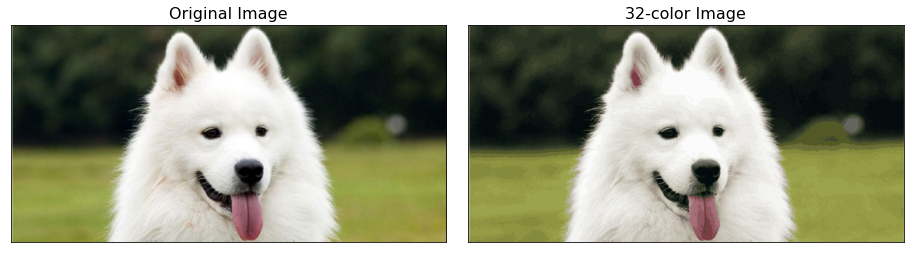

In [7]:
#So sánh hình ban đầu với ảnh gốc ban đầu
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                        subplot_kw=dict(xticks=[], yticks=[]))
fig. subplots_adjust(wspace=0.05) 
ax[0].imshow(image) 
ax[0].set_title('Original Image', size=16) 
ax[1].imshow(img_recolored) 
ax[1].set_title('32-color Image', size=16);

In [8]:
#Lưu kết quả xuống đĩa cứng
img_recolored = img_recolored * 255
new_img = Image.fromarray(img_recolored.astype(np. uint8)) 
new_img.save('C:/Users/HOANG NAM/Desktop/compressed_img2.png')